In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

#### Creating DataFrame

In [2]:
df = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv")
df.head()

/tmp/ipykernel_18/4002671267.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
data = df[["reviews.text", "reviews.rating"]]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [6]:
#drop null values
data.dropna(inplace=True)
data.isnull().sum()

/tmp/ipykernel_18/4210551023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


reviews.text      0
reviews.rating    0
dtype: int64

In [7]:
import random
n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
I currently have two fire TVs in my home. Prior to this I had an apple TV which was the one before the newest generation of 2016. It became obsolete with slow streaming speeds all the time. After purchasing the Fire TV I can honestly say its the best bargain in town. The price is just right and has not been an issue in speed or clarity for streaming all your favorite movies shows. The ease of use is also a big plus. I highly recommend if you are on the fence. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
It is a very good buy at this price. Easy to carry 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I love the kindle fire. I have an I pad but I love to read on my kindle. The size is great, I like to read at night so my kindle makes it much easier. My grandson also plays games on it. It is a great product. 

RATE:
5.0

 --------

In [8]:
# descriptive statistics
data.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: count, dtype: int64

In [10]:
rating = data["reviews.rating"].value_counts
rating

<bound method IndexOpsMixin.value_counts of 0        5.0
1        5.0
2        5.0
3        4.0
4        5.0
        ... 
34655    3.0
34656    1.0
34657    1.0
34658    1.0
34659    1.0
Name: reviews.rating, Length: 34626, dtype: float64>

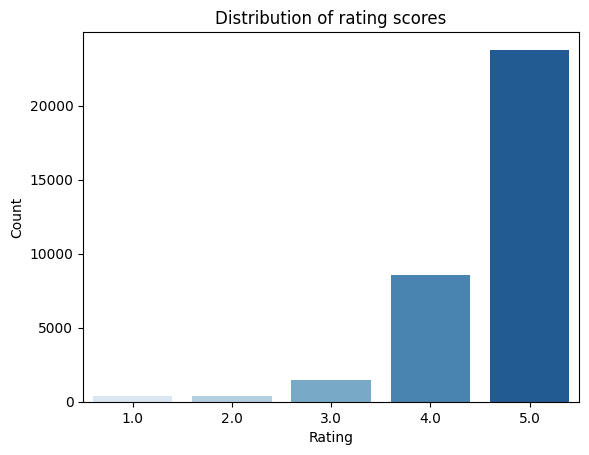

In [11]:
# distribution of rating
sns.countplot(x = data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### the given data has less ammount of bad rating reviews. for better training we'll need more data for the purpose
<p> filtering and importing low ratings from the data </p>

In [12]:
# loading new data
data_2 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data_2 = data_2[["reviews.text", "reviews.rating"]]

# using only lower ratings. less than or equals 3
data_2 = data_2[data_2["reviews.rating"] <= 3].reset_index(drop=True)

#now for 3rd Dataset as well

data_3 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data_3 = data_3[["reviews.text", "reviews.rating"]]
data_3 = data_3[data_3["reviews.rating"] <=3 ].reset_index(drop=True)


In [13]:
data_2["reviews.rating"].value_counts().sort_index(ascending=False)

reviews.rating
3    1206
2     616
1     965
Name: count, dtype: int64

In [14]:
data_3["reviews.rating"].value_counts().sort_index(ascending=False)

reviews.rating
3    197
2     54
1     63
Name: count, dtype: int64

In [15]:
#concatination
data = pd.concat([data, data_2, data_3])

data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [16]:
data["reviews.rating"].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: count, dtype: int64

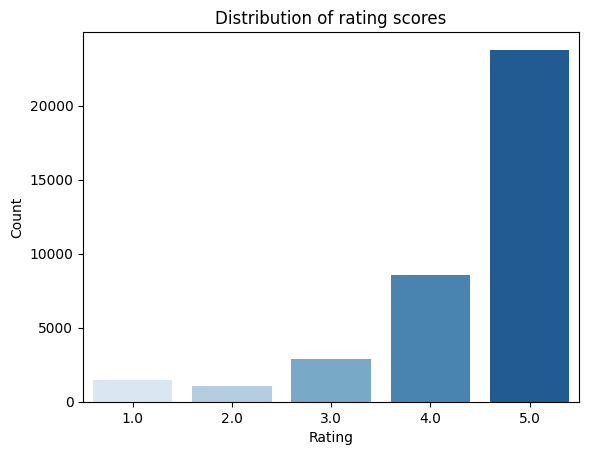

In [17]:
# distribution of rating
sns.countplot(x = data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
# we'll map ratings.

sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}
sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}
data['sentiment_score'] = data ['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

In [19]:
data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


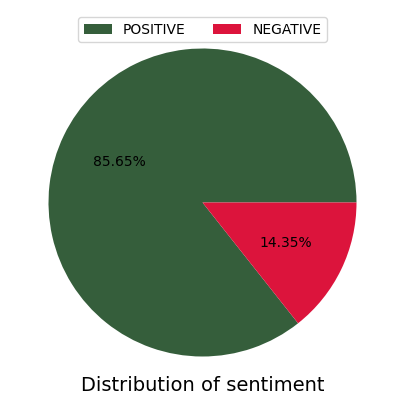

In [20]:
plt.figure(figsize = (5,5))

labels = ['POSITIVE', 'NEGATIVE']
colors = colors = ['#355E3B', '#DC143C']

plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [21]:
# getting all used words
all_words = pd.Series(' '.join(data['reviews.text']).split())

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

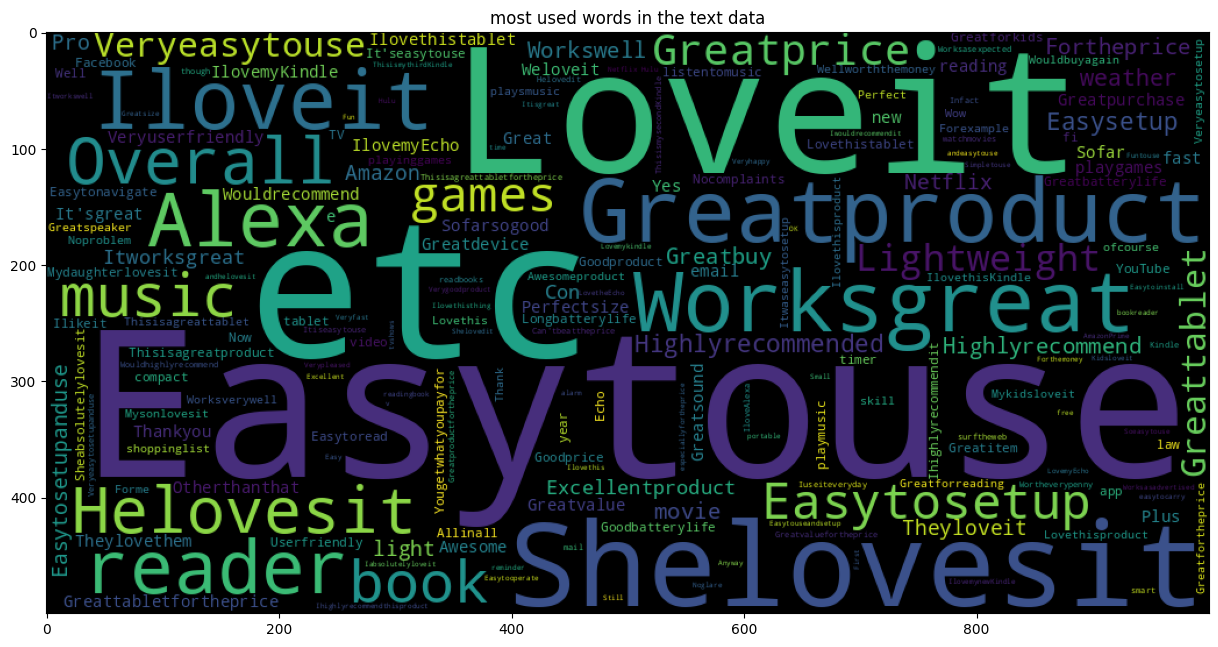

In [23]:
# plotting word cloud

wordcloud = WordCloud(width = 1000, height = 500).generate(''.join(all_words))

plt.figure(figsize = (15,8) )
plt.imshow(wordcloud)
plt.title ('most used words in the text data')

plt.show()